In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [20]:
df=pd.read_csv('data_cleaning_practice.csv')

In [21]:
df

,Name,Age,Gender,Salary,Department,Experience_Years,Joining_Date,Performance_Score
0,Ali,22.0,Male,50000.0,IT,2.0,2021-05-12,3.5
1,Sara,25.0,Female,60000.0,HR,3.0,2020-03-15,4.2
2,Ahmed,NaN,Male,55000.0,IT,2.0,2022-07-01,NaN
3,Ayesha,29.0,Female,NaN,Finance,5.0,2019-01-20,4.8
4,Bilal,21.0,Male,48000.0,IT,1.0,2023-06-10,3.9
5,Fatima,24.0,NaN,62000.0,HR,4.0,2020-09-05,4.1
6,NaN,23.0,Female,58000.0,Finance,NaN,2021-11-11,3.7
7,Hassan,NaN,Male,54000.0,NaN,3.0,2022-02-02,4.0
8,Zara,26.0,Female,NaN,IT,2.0,2019-12-30,NaN
9,Usman,22.0,Male,51000.0,HR,2.0,2021-08-18,3.8


In [22]:
df.head()

,Name,Age,Gender,Salary,Department,Experience_Years,Joining_Date,Performance_Score
0,Ali,22.0,Male,50000.0,IT,2.0,2021-05-12,3.5
1,Sara,25.0,Female,60000.0,HR,3.0,2020-03-15,4.2
2,Ahmed,NaN,Male,55000.0,IT,2.0,2022-07-01,NaN
3,Ayesha,29.0,Female,NaN,Finance,5.0,2019-01-20,4.8
4,Bilal,21.0,Male,48000.0,IT,1.0,2023-06-10,3.9


In [23]:
df.tail()

,Name,Age,Gender,Salary,Department,Experience_Years,Joining_Date,Performance_Score
6,NaN,23.0,Female,58000.0,Finance,NaN,2021-11-11,3.7
7,Hassan,NaN,Male,54000.0,NaN,3.0,2022-02-02,4.0
8,Zara,26.0,Female,NaN,IT,2.0,2019-12-30,NaN
9,Usman,22.0,Male,51000.0,HR,2.0,2021-08-18,3.8
10,Ahmed,NaN,Male,55000.0,IT,2.0,2022-07-01,NaN


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               10 non-null     object 
 1   Age                8 non-null      float64
 2   Gender             10 non-null     object 
 3   Salary             9 non-null      float64
 4   Department         10 non-null     object 
 5   Experience_Years   10 non-null     float64
 6   Joining_Date       11 non-null     object 
 7   Performance_Score  8 non-null      float64
dtypes: float64(4), object(4)
memory usage: 836.0+ bytes


In [25]:
df.isnull().sum()

Name                 1
Age                  3
Gender               1
Salary               2
Department           1
Experience_Years     1
Joining_Date         0
Performance_Score    3
dtype: int64

In [26]:
df['Name']=df['Name'].fillna("UNKNOWN")

In [27]:
df['Department']=df['Department'].fillna("UNKNOWN")

In [28]:
for col in df.select_dtypes(include=['float64','int64']).columns:
    df[col]=df[col].fillna(df[col].median())

In [29]:
df.isnull().sum()

Name                 0
Age                  0
Gender               1
Salary               0
Department           0
Experience_Years     0
Joining_Date         0
Performance_Score    0
dtype: int64

In [30]:
df['Gender']=df['Gender'].fillna("Others")

In [31]:
df.isnull().sum()

Name                 0
Age                  0
Gender               0
Salary               0
Department           0
Experience_Years     0
Joining_Date         0
Performance_Score    0
dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               11 non-null     object 
 1   Age                11 non-null     float64
 2   Gender             11 non-null     object 
 3   Salary             11 non-null     float64
 4   Department         11 non-null     object 
 5   Experience_Years   11 non-null     float64
 6   Joining_Date       11 non-null     object 
 7   Performance_Score  11 non-null     float64
dtypes: float64(4), object(4)
memory usage: 836.0+ bytes


In [33]:
df['Joining_Date']=pd.to_datetime(df['Joining_Date'],errors='coerce')

In [34]:
df.duplicated().sum()

np.int64(1)

In [40]:
df.drop_duplicates(inplace=True)

In [41]:
df.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [42]:
df.shape

(10, 8)

In [43]:
df["Joining_Year"] = df["Joining_Date"].dt.year
df["Joining_Month"] = df["Joining_Date"].dt.month


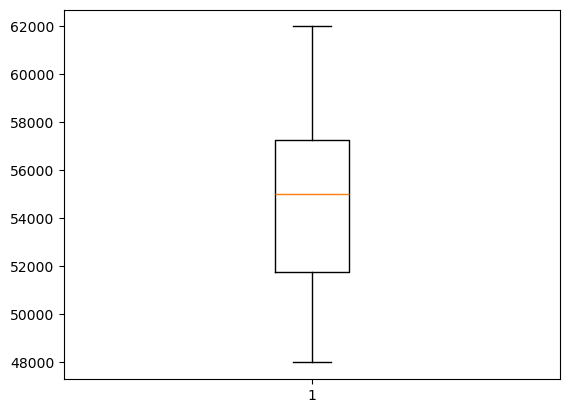

In [46]:
plt.boxplot(x=df['Salary'])
plt.show()

In [ ]:
# 🔹 Average Salary by gender
df.groupby('Gender')['Salary'].mean()

Gender
Female    57000.0
Male      51600.0
Others    62000.0
Name: Salary, dtype: float64

In [48]:
# 🔹 Average Salary by departement
df.groupby('Department')['Salary'].mean()

Department
Finance    56500.000000
HR         57666.666667
IT         52000.000000
UNKNOWN    54000.000000
Name: Salary, dtype: float64

<Axes: xlabel='Department'>

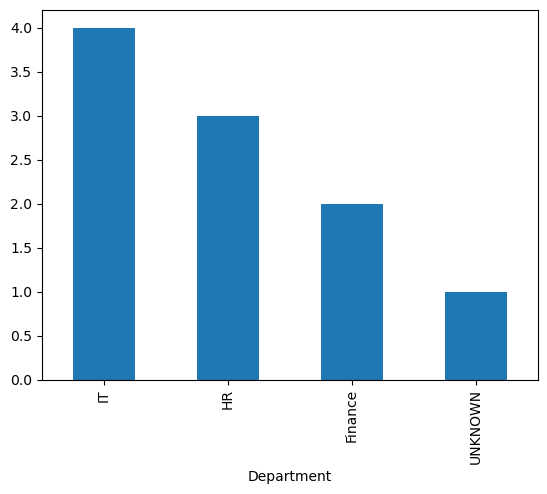

In [50]:
df['Department'].value_counts().plot(kind='bar')

In [54]:
df.groupby("Experience_Years")['Salary'].mean()

Experience_Years
1.0    48000.0
2.0    53800.0
3.0    57000.0
4.0    62000.0
5.0    55000.0
Name: Salary, dtype: float64

In [52]:
df.columns

Index(['Name', 'Age', 'Gender', 'Salary', 'Department', 'Experience_Years',
       'Joining_Date', 'Performance_Score', 'Joining_Year', 'Joining_Month'],
      dtype='object')